

> 2702305576 - Grace Esther D. S.



# **Prediksi Tingkat Obesitas Berdasarkan Gaya Hidup**

Proyek ini bertujuan untuk membangun model klasifikasi machine learning guna memprediksi tingkat obesitas seseorang berdasarkan karakteristik demografis dan kebiasaan gaya hidup. Sistem ini dikembangkan untuk membantu klinik kesehatan melakukan pendekatan proaktif terhadap individu yang memiliki risiko tinggi mengalami obesitas berat.

## Deskripsi Dataset

Dataset ini berisi informasi dari 1056 individu dengan 17 kolom fitur dan 1 target klasifikasi (`NObeyesdad`). Variabel-variabel yang tersedia mencakup karakteristik biologis, kebiasaan makan, aktivitas fisik, dan pola hidup. Target klasifikasi terdiri dari 7 kelas tingkat obesitas:

- **Insufficient_Weight**
- **Normal_Weight**
- **Overweight_Level_I**
- **Overweight_Level_II**
- **Obesity_Type_I**
- **Obesity_Type_II**
- **Obesity_Type_III**

### Fitur-Fitur:

| Fitur | Deskripsi |
|-------|-----------|
| `Gender` | Jenis kelamin (laki-laki atau perempuan) |
| `Age` | Usia (dalam tahun) |
| `Height` | Tinggi badan (meter) |
| `Weight` | Berat badan (kilogram) |
| `family_history_with_overweight` | Riwayat keluarga dengan kelebihan berat badan (ya/tidak) |
| `FAVC` | Konsumsi makanan berkalori tinggi (ya/tidak) |
| `FCVC` | Frekuensi konsumsi sayuran (1–3) |
| `NCP` | Jumlah makanan utama per hari |
| `CAEC` | Kebiasaan makan di luar jam makan utama |
| `SMOKE` | Kebiasaan merokok (ya/tidak) |
| `CH2O` | Asupan air harian (1–3) |
| `SCC` | Memantau asupan kalori (ya/tidak) |
| `FAF` | Aktivitas fisik mingguan (0–3) |
| `TUE` | Waktu penggunaan teknologi (0–3) |
| `CALC` | Konsumsi alkohol |
| `MTRANS` | Moda transportasi utama |
| `NObeyesdad` | Label target (tingkat obesitas) |

Import library yang diperlukan

In [319]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [320]:
df = pd.read_csv('ObesityDataSet2.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I


In [321]:
df.shape

(1056, 17)

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1056 non-null   object 
 1   Age                             1056 non-null   object 
 2   Height                          1056 non-null   float64
 3   Weight                          1056 non-null   float64
 4   family_history_with_overweight  1056 non-null   object 
 5   FAVC                            1056 non-null   object 
 6   FCVC                            1019 non-null   float64
 7   NCP                             1056 non-null   float64
 8   CAEC                            1056 non-null   object 
 9   SMOKE                           1056 non-null   object 
 10  CH2O                            1056 non-null   float64
 11  SCC                             1056 non-null   object 
 12  FAF                             10

In [323]:
df.describe()

,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1056.000000,1056.000000,1019.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,1.700066,86.497633,2.421374,2.651686,1.998002,0.987528,0.642227
std,0.091560,26.181219,0.537591,0.804457,0.612930,0.850452,0.615533
min,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.630000,66.000000,2.000000,2.525000,1.530000,0.110000,0.000000
50%,1.700000,82.635000,2.390000,3.000000,2.000000,1.000000,0.583000
75%,1.760000,107.965000,3.000000,3.000000,2.442500,1.602500,1.000000
max,1.950000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [324]:
df.nunique()

,0
Gender,2
Age,46
Height,47
Weight,715
family_history_with_overweight,2
FAVC,2
FCVC,147
NCP,194
CAEC,4
SMOKE,2


In [325]:
df.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,37
NCP,0
CAEC,0
SMOKE,0


In [326]:
df['NObeyesdad'].value_counts()

,count
NObeyesdad,
Obesity_Type_I,176
Obesity_Type_III,162
Obesity_Type_II,149
Overweight_Level_II,145
Overweight_Level_I,145
Normal_Weight,143
Insufficient_Weight,136


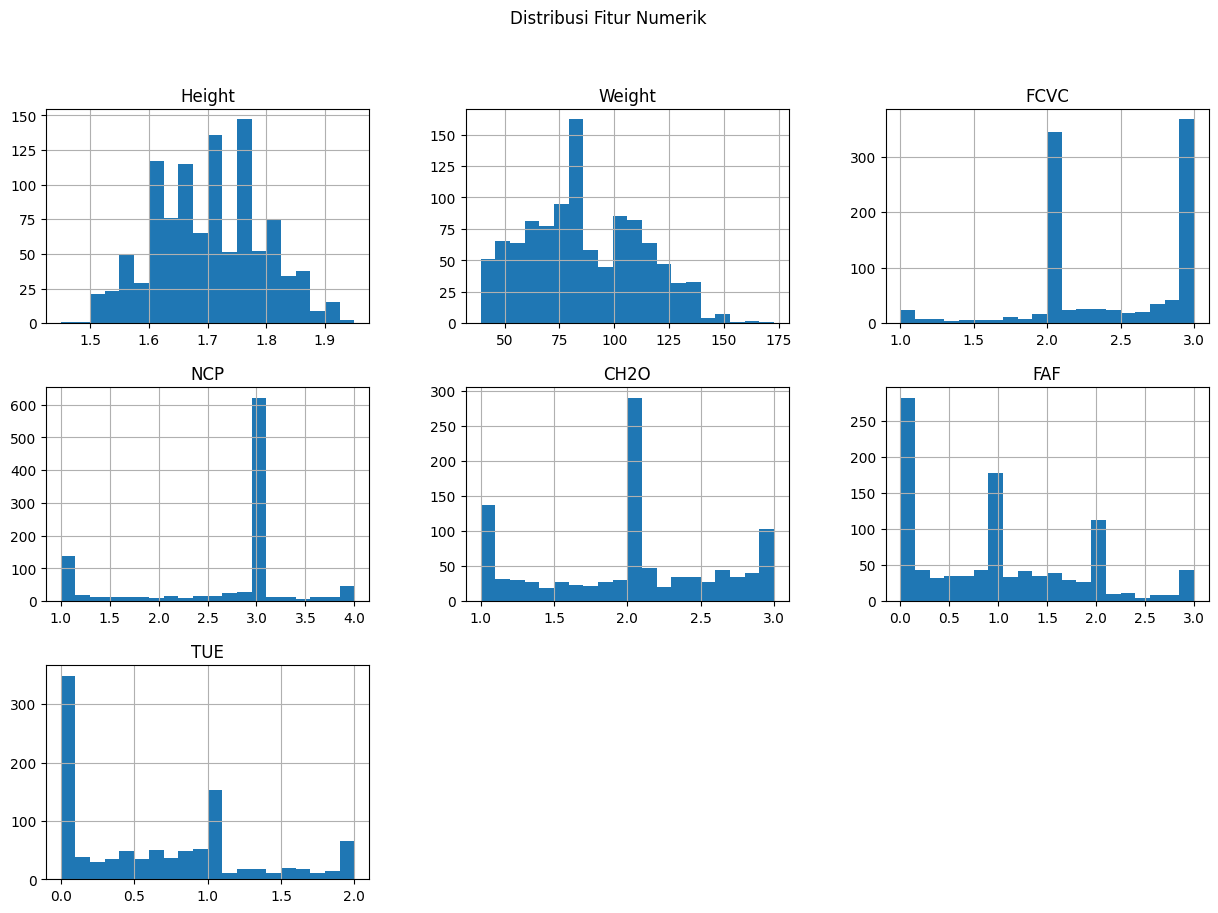

In [327]:
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribusi Fitur Numerik")
plt.show()

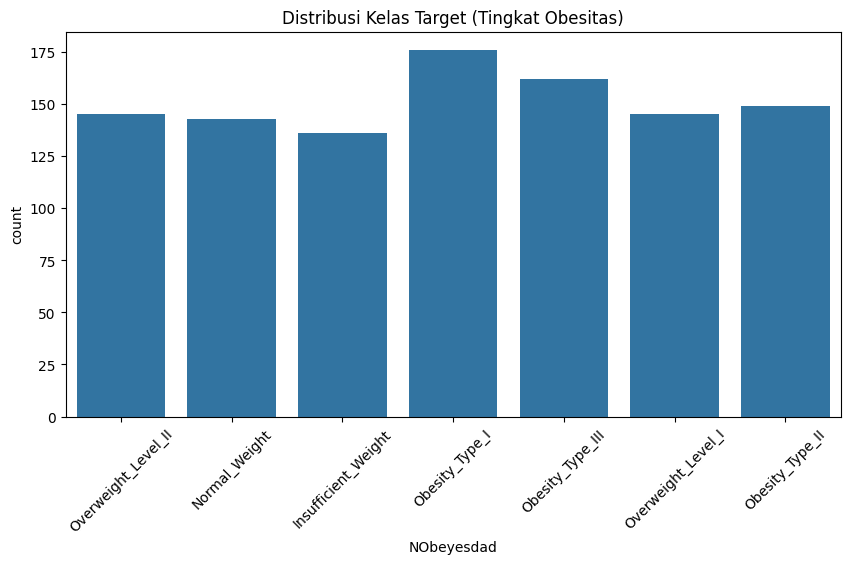

In [328]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='NObeyesdad')
plt.title("Distribusi Kelas Target (Tingkat Obesitas)")
plt.xticks(rotation=45)
plt.show()

In [329]:
invalid_age_rows = df[pd.to_numeric(df['Age'], errors='coerce').isnull()]
print(invalid_age_rows['Age'].unique())

['20 years' '22 years' '17 years' '25 years' '21 years' '19 years'
 '36 years' '26 years' '33 years' '23 years']


In [331]:
for col in ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'CALC', 'MTRANS']:
    print(f"{col}:", df[col].unique())

Gender: ['Female' 'Male']
family_history_with_overweight: ['yes' 'no']
FAVC: ['no' 'yes']
SMOKE: ['no' 'yes']
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS: ['Public_Transportation' 'Bike' nan 'Automobile' 'Motorbike' 'Walking']


Preprocessing kolom numerik 'Age' yang mengandung string (misalnya '20 years')

In [332]:
df['Age'] = df['Age'].astype(str).str.extract(r'(\d+\.?\d*)')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

Split dataset menjadi fitur dan target

In [333]:
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

Bagi data menjadi training dan testing set (80:20), stratified berdasarkan kelas target

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Definisikan kelompok fitur berdasarkan jenisnya

In [335]:
numeric_features = ['Age', 'Height', 'Weight']
ordinal_features = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

Bangun pipeline preprocessing untuk masing-masing tipe kolom

In [336]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),

        ('ord', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder(
                categories=[
                    [1.0, 2.0, 3.0],         # FCVC
                    [1.0, 2.0, 3.0, 4.0],     # NCP
                    [1.0, 2.0, 3.0],         # CH2O
                    [0.0, 1.0, 2.0, 3.0],     # FAF
                    [0.0, 0.5, 1.0, 2.0]      # TUE
                ],
                handle_unknown='use_encoded_value',
                unknown_value=-1
            ))
        ]), ordinal_features),

        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)

Susun pipeline akhir: preprocessing dan model

In [337]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

Latih model dengan data training

In [338]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[[1.0,
                                                                                               2.0,
                                                                                               3.0],
                                                                                              [1.0,
                                                                                               2.0,
                                                                                               3.0,
                                                                                               4.0],
                                                                                              [1.0,
                                                                                               2.0,
                                                                                               3.0],
                                                                                              [0...
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Evaluasi model terhadap data testing

In [339]:
y_pred = model.predict(X_test)
test_score = model.score(X_test, y_test)
print(f"Test Accuracy: {test_score:.4f}")

Test Accuracy: 0.9292


In [340]:
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        27
      Normal_Weight       0.78      1.00      0.88        29
     Obesity_Type_I       0.97      0.89      0.93        35
    Obesity_Type_II       0.97      0.97      0.97        30
   Obesity_Type_III       0.97      0.97      0.97        33
 Overweight_Level_I       0.96      0.86      0.91        29
Overweight_Level_II       0.89      0.83      0.86        29

           accuracy                           0.93       212
          macro avg       0.93      0.93      0.93       212
       weighted avg       0.94      0.93      0.93       212



Visualisasi confusion matrix

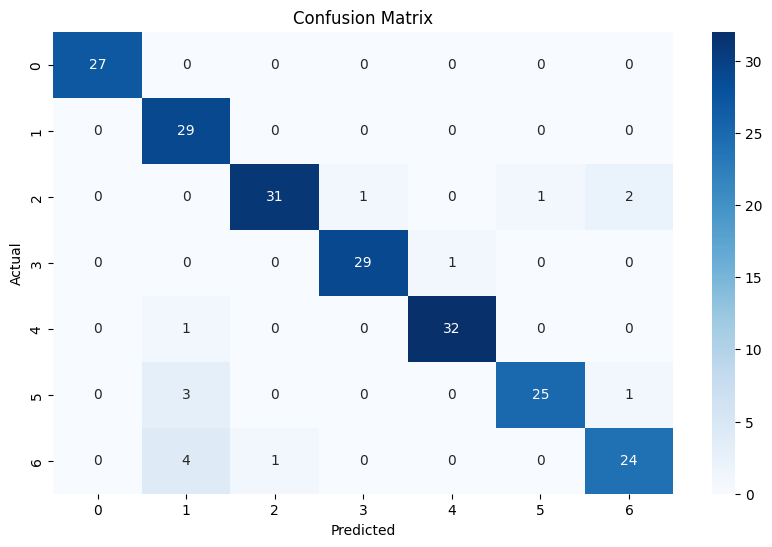

In [341]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Kesimpulan Evaluasi Model

Classification model berbasis **Random Forest** yang dikembangkan berhasil menunjukkan performa yang sangat baik dalam memprediksi tingkat obesitas seseorang berdasarkan data gaya hidup dan kebiasaan sehari-hari. Berikut ringkasan temuan dari hasil evaluasi terhadap data testing:

- **Akurasi keseluruhan** mencapai **93%**, menunjukkan kemampuan model yang tinggi dalam mengklasifikasikan data baru.
- **Macro average F1-score** dan **weighted average F1-score** juga mencapai **0.93**, yang menandakan konsistensi performa di semua kelas.
- Model memiliki **presisi dan recall sempurna (1.00)** pada kelas **Insufficient_Weight**, serta performa stabil di kelas obesitas tinggi (`Obesity_Type_II`, `Obesity_Type_III`).
- Performa sedikit menurun pada kelas **Overweight_Level_II** dan **Normal_Weight**, namun tetap berada pada tingkat yang sangat baik dengan F1-score ≥ 0.86.

Sehingga model ini layak digunakan sebagai komponen prediktif dalam praktik real life, seperti sistem informasi klinik untuk mendeteksi risiko obesitas secara lebih proaktif.

---


Simpan model ke file .pkl untuk deployment backend

In [342]:
joblib.dump(model, 'obesity_model.pkl')

['obesity_model.pkl']